In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Read data from CSV file
data = pd.read_csv(r"C:\Users\DELL\Desktop\StressLevelDataset .csv")
data.head(20)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [3]:
data.head(2)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2


In [6]:
# Extract input features (mental_heealth, depression,blood_pressure,sleep_quality,breathing_problem,noise_level,study_load,extraxurricular_activities) and SOC values
X = data[['mental_health_history','depression','blood_pressure','sleep_quality','breathing_problem','noise_level','study_load','extracurricular_activities']].values
stress = data['stress_level'].values
print(stress)

[1 2 1 ... 0 2 2]


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, stress, test_size=0.2, random_state=42)
print(y_test)

[2 0 1 1 0 1 2 0 1 1 0 0 0 2 0 0 0 2 1 0 1 2 0 1 1 2 1 0 0 0 2 2 2 0 0 1 0
 1 2 2 2 0 1 0 2 0 2 2 0 0 1 0 0 0 1 1 2 0 1 1 2 0 1 0 2 0 2 1 2 0 1 1 1 1
 0 2 1 0 1 1 1 0 0 1 1 0 2 2 2 1 0 2 0 1 0 1 0 0 1 1 2 0 0 2 1 0 1 2 1 2 2
 2 1 0 2 2 2 2 0 0 2 1 1 1 2 2 0 2 0 2 2 1 2 0 0 2 1 2 2 2 0 2 0 1 0 0 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 2 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 1 1 2 1 2 1 2 0 1 1 0 1 1 2 2 1 2 0 1 2 2 2 1 0 2 1 2 0 0 1 2 2 0 1]


In [8]:
len(y_test)

220

In [9]:
# Train a Random Forest regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
 #Make predictions on the testing set
stress_predictions = random_forest_model.predict(X_test)
print(stress_predictions)

[2.   0.   1.   1.   0.   1.   2.   0.   1.   1.08 0.   0.   0.   2.
 1.24 0.   0.   2.   1.   0.   1.   1.38 0.   1.   1.   2.   0.71 0.
 0.   0.   1.17 2.   2.   0.   0.   1.   0.54 1.   2.   2.   2.   0.
 1.   0.89 2.   0.   2.   0.53 0.   0.   1.   0.   0.   0.   1.   1.
 2.   0.75 1.   1.   2.   0.   0.63 0.   1.49 0.   0.85 1.   2.   0.95
 0.86 1.   0.86 1.   0.   1.45 1.   0.   1.   0.42 1.   0.   0.   1.
 1.   1.27 2.   2.   2.   1.   0.   1.24 0.   1.   1.1  0.94 1.18 0.
 1.   1.   2.   0.   0.   2.   0.29 1.03 1.   2.   1.   2.   2.   2.
 1.   0.   0.67 1.17 2.   2.   0.   0.   2.   1.   0.71 1.   2.   1.12
 0.   2.   0.   2.   2.   1.   0.62 0.   0.   2.   1.   2.   2.   2.
 0.   2.   0.   1.   0.   1.34 2.   1.03 0.   2.   1.   1.   2.   1.
 1.   1.   2.   0.   2.   0.   0.   0.   0.   0.   1.   0.   1.   2.
 1.3  1.   1.   0.   2.   2.   0.   0.   0.   2.   2.   0.   1.   0.
 1.   1.   1.   0.   0.71 1.   2.   1.   2.   1.   2.   1.02 1.   1.
 0.54 1.   1.   2.   2.   1.  

In [11]:
from sklearn.metrics import mean_squared_error

In [15]:
# Model evaluation
mse = mean_squared_error(y_test, stress_predictions)
r2 = r2_score(y_test, stress_predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 0.13107818181818184
R-squared: 0.8036768064366393


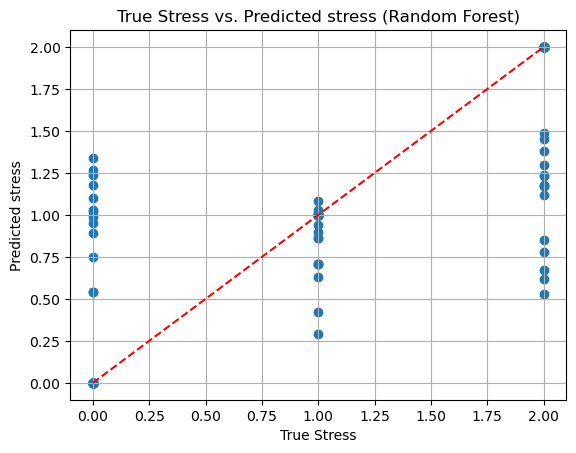

In [16]:
# Plot the true stess values vs. predicted stress values
plt.scatter(y_test, stress_predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')  # Diagonal line
plt.xlabel('True Stress')
plt.ylabel('Predicted stress')
plt.title('True Stress vs. Predicted stress (Random Forest)')
plt.grid(True)
plt.show()

In [17]:
predictions_df = pd.DataFrame({
    'Actual state of charging': (y_test),# current load other name state of health

    'Predicted state of charging ': (stress_predictions)
})

# Display the DataFrame
print(predictions_df)

     Actual state of charging  Predicted state of charging 
0                           2                          2.00
1                           0                          0.00
2                           1                          1.00
3                           1                          1.00
4                           0                          0.00
..                        ...                           ...
215                         1                          1.00
216                         2                          2.00
217                         2                          1.18
218                         0                          0.99
219                         1                          1.00

[220 rows x 2 columns]


In [18]:
print(y_test)

[2 0 1 1 0 1 2 0 1 1 0 0 0 2 0 0 0 2 1 0 1 2 0 1 1 2 1 0 0 0 2 2 2 0 0 1 0
 1 2 2 2 0 1 0 2 0 2 2 0 0 1 0 0 0 1 1 2 0 1 1 2 0 1 0 2 0 2 1 2 0 1 1 1 1
 0 2 1 0 1 1 1 0 0 1 1 0 2 2 2 1 0 2 0 1 0 1 0 0 1 1 2 0 0 2 1 0 1 2 1 2 2
 2 1 0 2 2 2 2 0 0 2 1 1 1 2 2 0 2 0 2 2 1 2 0 0 2 1 2 2 2 0 2 0 1 0 0 2 1
 0 2 1 1 2 1 1 1 2 0 2 0 0 0 0 0 1 0 1 2 2 1 1 0 2 2 0 0 0 2 2 0 1 0 1 1 1
 0 1 1 2 1 2 1 2 0 1 1 0 1 1 2 2 1 2 0 1 2 2 2 1 0 2 1 2 0 0 1 2 2 0 1]


In [19]:
print(stress)

[1 2 1 ... 0 2 2]


In [20]:
 #Convert predictions and true labels to binary format
# For example, let's assume we're interested in binary classification where 1 is positive and 0 is negative
threshold = 0.5  # You can adjust this threshold based on your problem
y_pred_binary = [1 if pred >= threshold else 0 for pred in stress_predictions]
y_true_binary = [1 if true >= threshold else 0 for true in y_test]

In [21]:
print(y_pred_binary)

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1]


In [22]:
print(y_true_binary)

[1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1]


In [24]:
from sklearn.metrics import confusion_matrix, f1_score


In [35]:
cm = confusion_matrix(y_true_binary,y_pred_binary )

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 63  13]
 [  2 142]]


In [36]:
import seaborn as sns

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

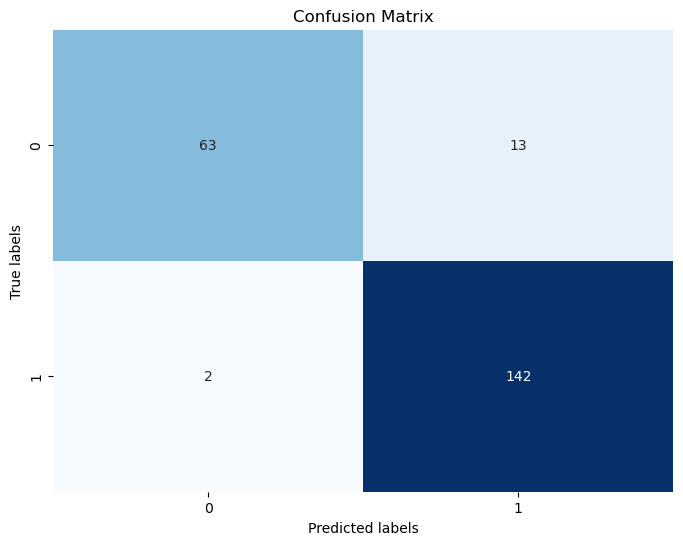

In [38]:
# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [39]:
from sklearn.metrics import f1_score

In [40]:
# Calculate F1 score
f1 = f1_score(y_true_binary, y_pred_binary, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9304127879521035


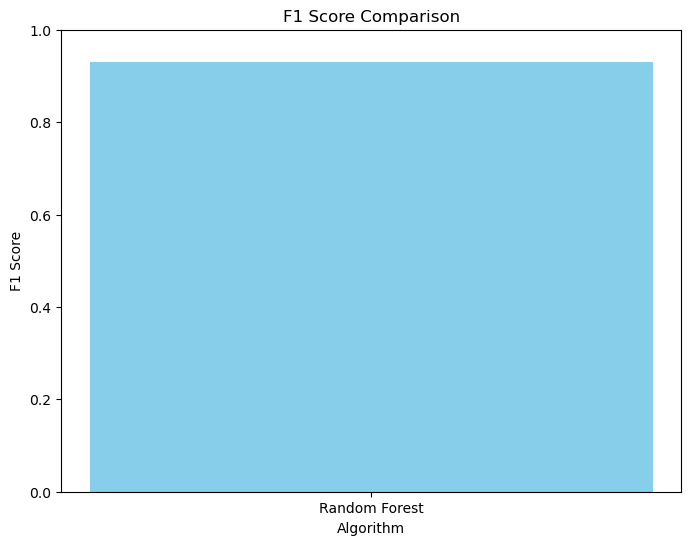

In [41]:
# Plot F1 score
plt.figure(figsize=(8, 6))
plt.bar(["Random Forest"], [f1], color='skyblue')
plt.title("F1 Score Comparison")
plt.xlabel("Algorithm")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.show()